# 0004.004 EDA - Exploring Implied Probabilities

In [1]:
import pathlib
# import os
import sys
# import pickle
# import inspect

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 2
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

from src.visualization.visualize import extend_cols

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA_FP = PROJECT_DIR / 'data' / 'reference' / 'eda' / 'sample.csv'

## Data Load & Cut to Bookmakers Odds for a Single Season

In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date']).sort_values(by=['date', 'h', 'a'])
odds_cols = [col for col in df_orig.columns if 'OddsLb' in col]
cols = extend_cols(odds_cols)
df_orig = df_orig[cols]
df_orig = df_orig[df_orig['season'] == '2007-2008']
df_orig.rename(columns={'hwinOddsLb': 'hwinOdds', 'drawOddsLb': 'drawOdds', 'awinOddsLb': 'awinOdds'}, inplace=True)
df_orig.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result,awinOdds,drawOdds,hwinOdds
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw,3.0,3.20,2.10
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin,11.0,5.00,1.20
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw,2.0,3.20,3.20
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin,2.6,3.20,2.37
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin,2.4,3.25,2.50


## Covert Odds to Probabilities and Normalize

In [3]:
df = df_orig.copy(deep=True)
# tot includes the bookie's overround
tot = 1/df['hwinOdds'] + 1/df['drawOdds'] + 1/df['awinOdds']
hwin = 1/df['hwinOdds']/tot; draw = 1/df['drawOdds']/tot; awin = 1/df['awinOdds']/tot
prob_cols = ['p(hwin)', 'p(draw)', 'p(awin)']
df[prob_cols[0]] = hwin ; df[prob_cols[1]] = draw ; df[prob_cols[2]] = awin
df.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result,awinOdds,drawOdds,hwinOdds,p(hwin),p(draw),p(awin)
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw,3.0,3.20,2.10,0.424403,0.278515,0.297082
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin,11.0,5.00,1.20,0.741240,0.177898,0.080863
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw,2.0,3.20,3.20,0.277778,0.277778,0.444444
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin,2.6,3.20,2.37,0.377051,0.279253,0.343696
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin,2.4,3.25,2.50,0.355758,0.273660,0.370582


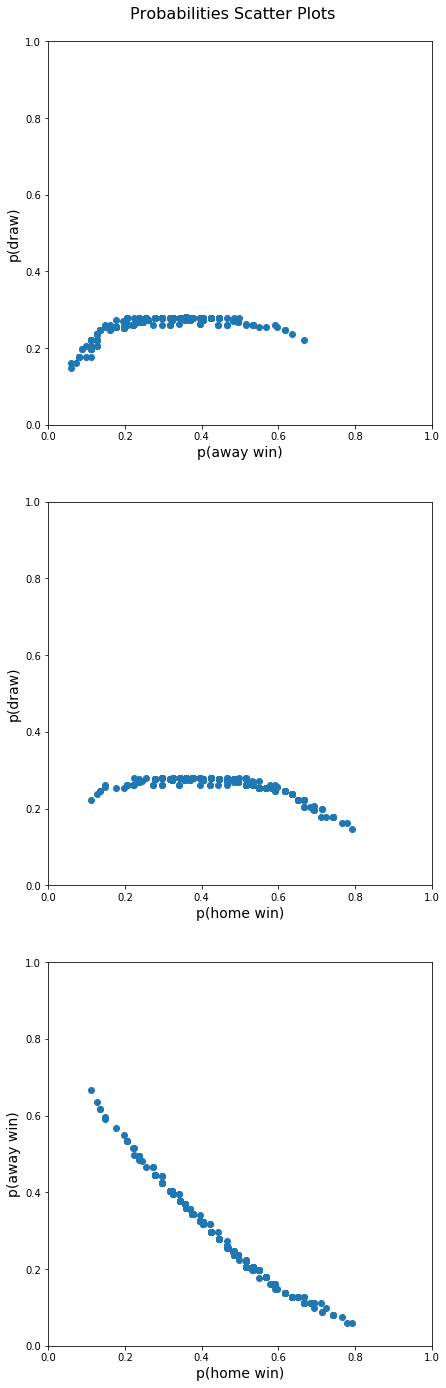

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,24))
ax1, ax2, ax3 = axs
lims = (0,1)
ax1.scatter(awin, draw)
ax1.set_xlabel('p(away win)', fontsize=14)
ax1.set_ylabel('p(draw)', fontsize=14)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)

ax2.scatter(hwin, draw)
ax2.set_xlabel('p(home win)', fontsize=14)
ax2.set_ylabel('p(draw)', fontsize=14)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)

ax3.scatter(hwin, awin)
ax3.set_xlabel('p(home win)', fontsize=14)
ax3.set_ylabel('p(away win)', fontsize=14)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)

plt.suptitle('Probabilities Scatter Plots', fontsize=16, y=0.9)
plt.show();

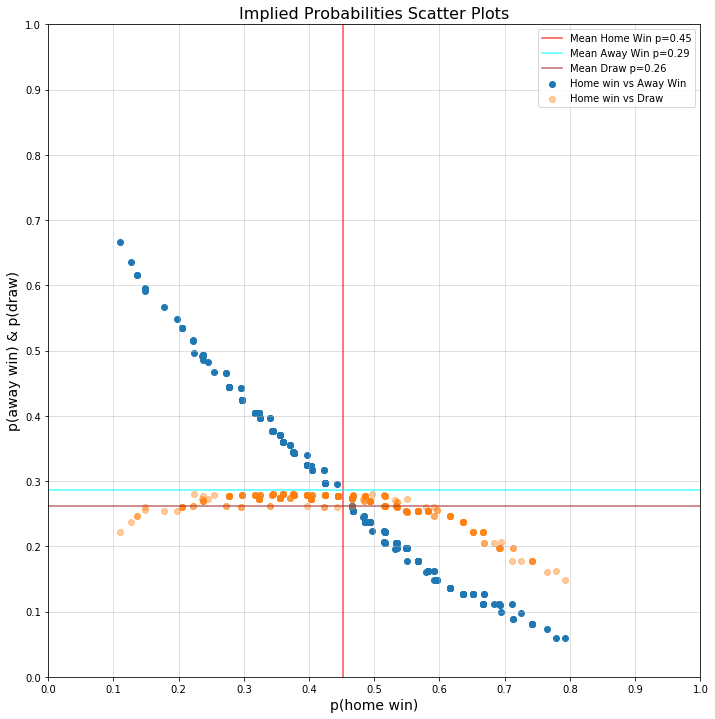

In [5]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,12))
lims = (0,1)

ax.scatter(hwin, awin, label = 'Home win vs Away Win')
ax.scatter(hwin, draw, alpha=0.4, label = 'Home win vs Draw')
ax.axvline(np.mean(hwin), color='red', label = f'Mean Home Win p={round(np.mean(hwin),2)}', alpha=0.7)
ax.axhline(np.mean(awin), color='cyan', label = f'Mean Away Win p={round(np.mean(awin),2)}', alpha=0.7)
ax.axhline(np.mean(draw), color='brown', label = f'Mean Draw p={round(np.mean(draw),2)}', alpha=0.7)
ax.set_xlabel('p(home win)', fontsize=14)
ax.set_ylabel('p(away win) & p(draw)', fontsize=14)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xticks(np.linspace(0,1.0,11))
ax.set_yticks(np.linspace(0,1.0,11))

ax.set_title('Implied Probabilities Scatter Plots', fontsize=16)
plt.grid(alpha=0.5)
plt.legend()
plt.show();

This plot is very interesting

Some notes:

+ The y value of the orange dot + the y value of the blue dot = 1
+ The range of home win probabilities is from about 0.1 to 0.8, whereas the range of away win probabilities is from about 0.08 to 0.7
+ The mean of the win probabilities (red vertical line) is 0.46, whereas it is 0.28 (cyan horizontal line) for the away win probabilities. This illustrates the home field advantage.
+ Out of the 3 probabilities, the mean probability is lowest for a draw at 0.26
+ The range of draw probabilities is lowest ranging from about 0.15 to 0.3
+ At any given home win probability, the probability range for a draw is only about 0.05 

## Implied Probability Plane

The equation for a plane is:
 $$ax + by +c = z$$
 
 and we know that our probabilities must add up to 1
 
 If we have a guaranteed home win the point is: 1home + 0away + 0draw = 1
 
 If we have a guaranteed away win the point is: 0home + 1away + 0draw = 1
  
 If we have a guaranteed draw the point is: 0home + 0away + 1draw = 1
 
 Our implied probabilities must sit somewhere on this plane

<IPython.core.display.Javascript object>


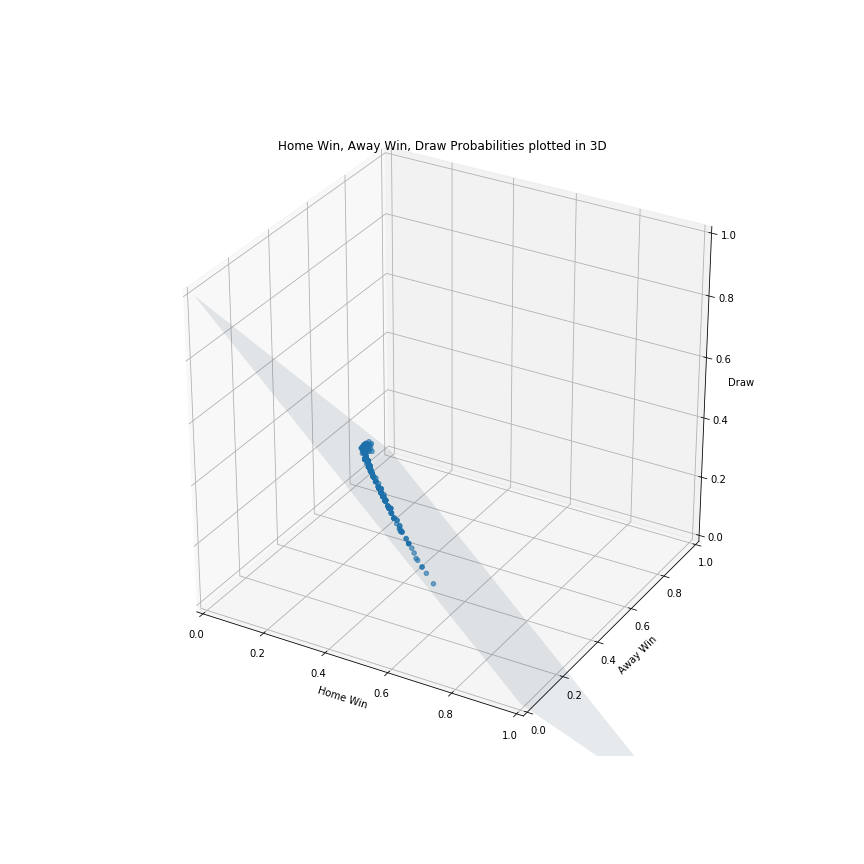

In [7]:
# Leave both these in. If no plot run cell again
%matplotlib notebook
%matplotlib notebook
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Create the plane that the points sit on x + y + z  1
points = np.array([[1,0,0], [0,1,0], [0,0,1]])
p0, p1, p2 = points
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(2), range(2))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]


# Plot the plane that the points sit on  - x + y + z = 1
ax.plot_surface(xx, yy, z, alpha=0.1)
ax.scatter(awin, hwin, draw, alpha=0.6)
ax.set_title('Home Win, Away Win, Draw Probabilities plotted in 3D')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_zlim(lims)
ax.set_xlabel('Home Win')
ax.set_ylabel('Away Win')
ax.set_zlabel('Draw')
plt.show();